In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import warnings

df = pd.read_csv('C:/Users/thale/Desktop/Piyose/demand_forecasting_data.csv')
df.head()

,Date,Product_ID,Base_Sales,Marketing_Campaign,Marketing_Effect,Seasonal_Trend,Seasonal_Effect,Price,Discount,Competitor_Price,Stock_Availability,Public_Holiday,Demand
0,2019-01-01,P002,65,Social Media,1.634270,Spring,1.0,73.496059,0.078198,64.173418,491,False,60570
1,2019-01-01,P004,94,Social Media,1.240566,Summer,1.2,74.271862,0.182151,69.571391,135,True,18143
2,2019-01-01,P003,125,Radio,1.087600,Summer,1.2,35.274616,0.102592,27.331268,180,False,37412
3,2019-01-01,P004,128,TV,1.831657,Winter,0.8,79.524248,0.196125,73.429502,227,False,40773
4,2019-01-01,P001,51,Radio,1.285161,Fall,1.1,96.237402,0.079253,88.243871,338,False,26917


In [7]:
#convert the date column
# Prepare the DataFrame (assumes 'Date' and 'Demand' columns exist)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Product_ID,Base_Sales,Marketing_Campaign,Marketing_Effect,Seasonal_Trend,Seasonal_Effect,Price,Discount,Competitor_Price,Stock_Availability,Public_Holiday,Demand
Date,,,,,,,,,,,,
2019-01-01,P002,65,Social Media,1.634270,Spring,1.0,73.496059,0.078198,64.173418,491,False,60570
2019-01-01,P004,94,Social Media,1.240566,Summer,1.2,74.271862,0.182151,69.571391,135,True,18143
2019-01-01,P003,125,Radio,1.087600,Summer,1.2,35.274616,0.102592,27.331268,180,False,37412
2019-01-01,P004,128,TV,1.831657,Winter,0.8,79.524248,0.196125,73.429502,227,False,40773
2019-01-01,P001,51,Radio,1.285161,Fall,1.1,96.237402,0.079253,88.243871,338,False,26917


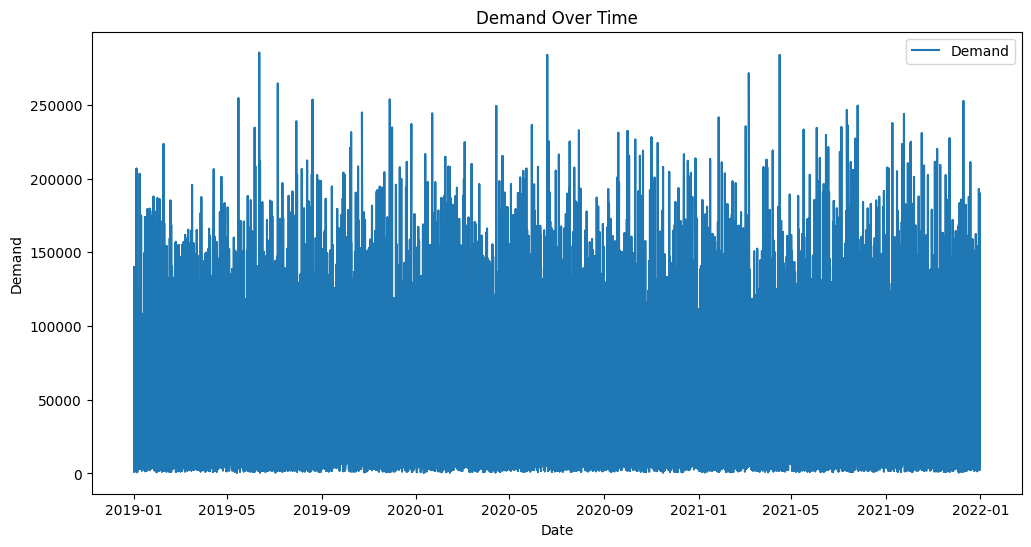

In [3]:
# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(df['Demand'], label='Demand')
plt.title('Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

In [8]:
# Determine ARIMA parameters (p, d, q)
# For simplicity, let's start with p=1, d=1, q=1
p, d, q = 1, 1, 1

# Fit the ARIMA model
model = ARIMA(df['Demand'], order=(p, d, q))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

C:\Users\thale\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\thale\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\thale\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Demand   No. Observations:                35000
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -418566.622
Date:                Thu, 17 Oct 2024   AIC                         837139.245
Time:                        01:00:07   BIC                         837164.634
Sample:                             0   HQIC                        837147.332
                              - 35000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0029      0.005     -0.534      0.593      -0.014       0.008
ma.L1         -1.0000      0.005   -188.431      0.000      -1.010      -0.990
sigma2       1.43e+09   3.78e-12   3.78e+20      0.0

In [11]:
# Make predictions (for the next 30 days)
forecast = model_fit.forecast(steps=30)

forecast.head()

C:\Users\thale\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


35000    48281.570195
35001    48236.401769
35002    48236.532454
35003    48236.532076
35004    48236.532077
Name: predicted_mean, dtype: float64

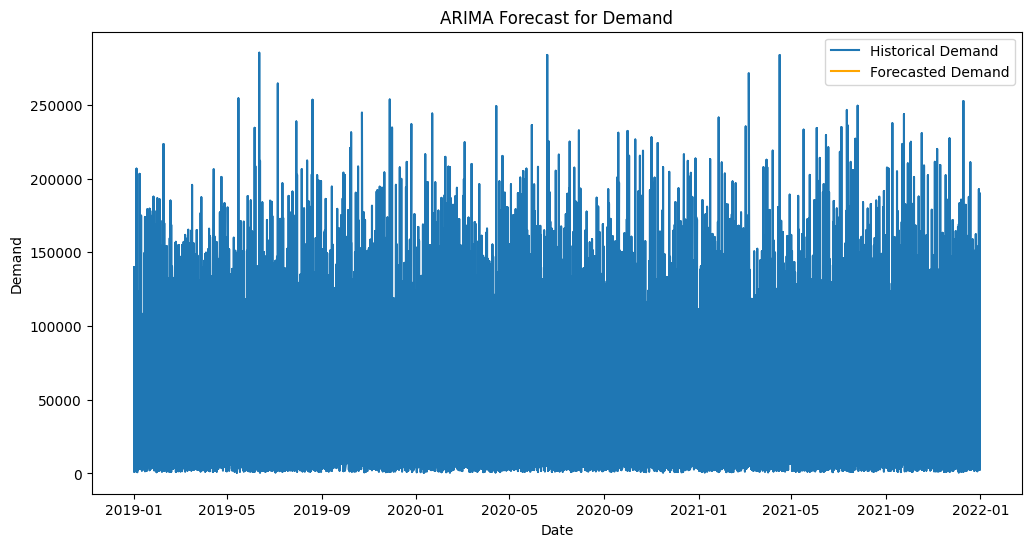

In [13]:
# Create a DataFrame for the forecast
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df['Demand'], label='Historical Demand')
plt.plot(forecast_df, label='Forecasted Demand', color='orange')
plt.title('ARIMA Forecast for Demand')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()